In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matlab
data=pd.read_csv("Housing_price_data_set.csv")
size=data['lotsize'].count()
data['num_driveway']=data.driveway.map({'yes':1,'no':0})
data['num_recroom']=data.recroom.map({'yes':1,'no':0})
data['num_fullbase']=data.fullbase.map({'yes':1,'no':0})
data['num_gashw']=data.gashw.map({'yes':1,'no':0})
data['num_airco']=data.airco.map({'yes':1,'no':0})
data['num_prefarea']=data.prefarea.map({'yes':1,'no':0})
X=data[['lotsize','bedrooms','bathrms','stories','num_driveway','num_recroom','num_fullbase','num_gashw','num_airco','garagepl','num_prefarea']].values
Y=data[['price']].values
print(X)

[[5850    3    1 ...    0    1    0]
 [4000    2    1 ...    0    0    0]
 [3060    3    1 ...    0    0    0]
 ...
 [6000    3    2 ...    1    1    0]
 [6000    3    2 ...    1    1    0]
 [6000    3    1 ...    1    1    0]]


In [63]:
one=np.ones(size,dtype=int)
matx=np.insert(X,0,one,axis=1)
n=len(matx[0])
transpose_x=np.transpose(matx)
temp=np.matmul(transpose_x,matx)



iden=np.identity(n,dtype=int)
iden[0][0]=0
var=1000

temp=temp+var*iden
temp2=np.matmul(transpose_x,Y)
invtemp=np.linalg.inv(temp)
parameters=np.matmul(invtemp,temp2)
print(parameters)

[[2.10719636e+04]
 [5.87699223e+00]
 [1.83544782e+03]
 [2.27115174e+03]
 [3.01071349e+03]
 [6.03000929e+02]
 [8.15591733e+02]
 [9.79253578e+02]
 [2.72661577e+02]
 [1.75260186e+03]
 [1.66498810e+03]
 [1.06938331e+03]]


[21071.96361867] , [5.87699223]


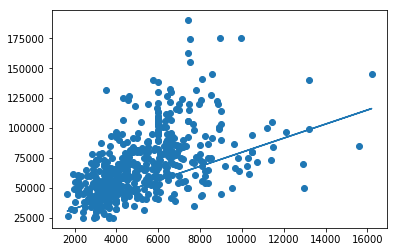

In [64]:
varx=data['lotsize']
print(parameters[0],",",parameters[1])
vary=parameters[0]+parameters[1]*varx
#matlab.xlim([2000,4000])
#matlab.ylim([30000,40000])
matlab.scatter(varx,Y)
matlab.plot(varx,vary)
